<a href="https://colab.research.google.com/github/Chaqmoqjon/Deep_Learning/blob/main/1_Cat_Find_DL_error_bor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import torch #2.5.1+cu124.  ~ 1.10.0+cu111.  #deep learning kutubxonasi
# import fastai #2.7.18. ~2.5.3  #deep learning kutubxonasi
# torch.cuda.is_available() #tekshirish

In [ ]:
#kutubxonalar
from fastai.vision.all import *
from ipywidgets import widgets #test uchun

In [ ]:
#data
path = untar_data(URLs.PETS)/'images' #berilgan manzil bo'yicha data ni yuklab oladi va zip fayldan ozod qilib aytilgan manzilga saqlaydi
# !ls /root/.fastai/data/oxford-iiit-pet/images #ko'p rasmlar bor. Katta harf bilan boshlanganlari - mushuk. Lichik harf bilan boshlangani - it

In [ ]:
#lebellovchi funksiya
def is_cat(x): return x[0].isupper() #dataning bosh harfi katta bilan boshlansa True

In [ ]:
#fastai ga, datasetimiz qayerda va qanday ko'rinishda ekanligini aytishimiz kerak
dls = ImageDataLoaders.from_name_func(  #fastai ning funksiyasini, metodi. datani o'qitishga tayyor holga keltiradi
    path, get_image_files(path), valid_pct=0.2, seed=42,  #rasm manzili, rasmni olish, validatsiyaga 20%, o'zgarmas ranodon sonlar
    label_func=is_cat, item_tfms=Resize(224) #javob qaytaradigan funksiya, rasmni o'zgartirish
)

##Convolutional Neural Networks (CNN)
Komyuter visionda, rasm va videolar bilan ishlaydigan model

In [ ]:
#tayyorlangan datasetni (dls), modelni (resnet34) va metriclarni uzatamiz
learn = cnn_learner(dls, resnet34, metrics = accuracy) #fastai dagi funksiya
learn.fine_tune(2) #dataning faqat bir qismini training qilish

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 131MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.175122,0.023986,0.992558,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.061555,0.033923,0.991204,00:49
1,0.031928,0.007228,0.997294,00:47


In [ ]:
#rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi? True
Aniqlik darajasi: 0.993


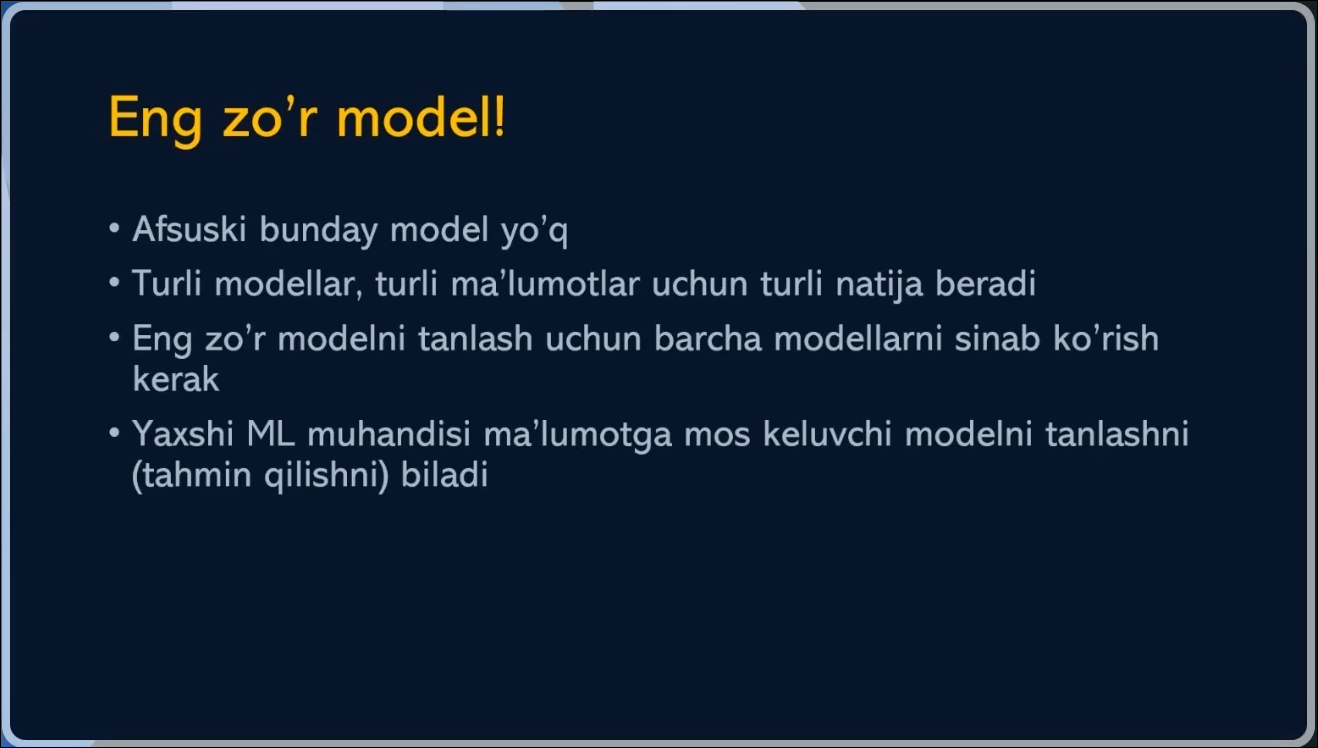

In [ ]:
img = PILImage.create(upload.data[-1]) #upload qilinganni rasmga aylantirish
pred, _, prob = learn.predict(img) #tahmin qilish (predict)

print(f"Mushukmi? {pred}") #mushuk bo'lsa True, aks holda False
print(f"Aniqlik darajasi: {prob[1].item():.3f}") #aniqlik darajasini 3 xonagacha ko'rsatib ber

img #rasm